In [1]:
import scanpy as sc

import scipy
import pandas as pd
#import os
import numpy as np


#import anndata as ad

#import multigrate as mtg

#from scipy import sparse
from matplotlib import pyplot as plt

sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.3 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.6.1


In [3]:
ref = sc.read('ref2.h5ad')

In [4]:
qr = sc.read('all2.h5ad')

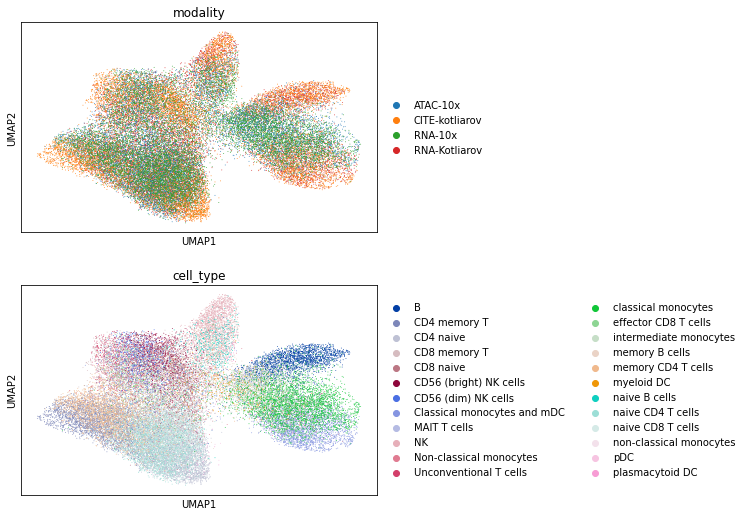

In [7]:
sc.pl.umap(ref, color=['modality', 'cell_type'], ncols=1)

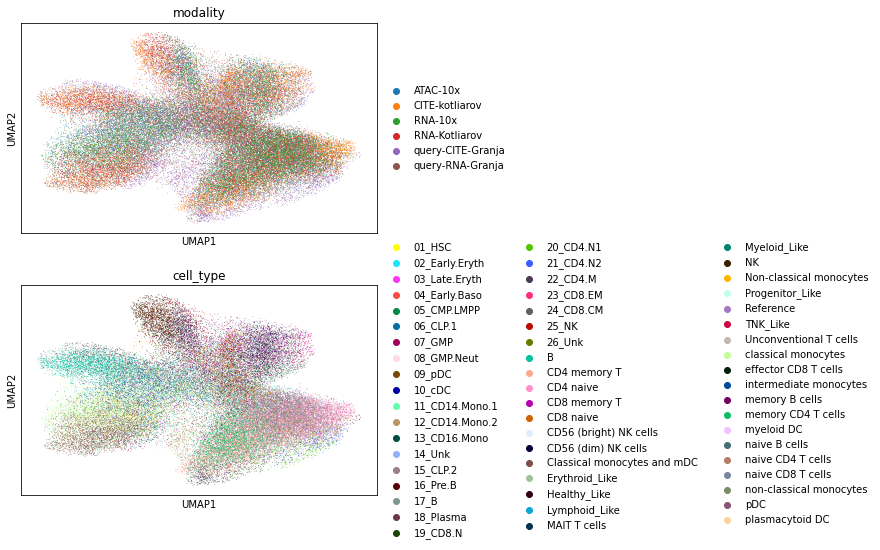

In [8]:
sc.pl.umap(qr, color=['modality', 'cell_type'], ncols=1)

In [154]:
sc.tl.louvain(qr, resolution=2)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_louvain.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


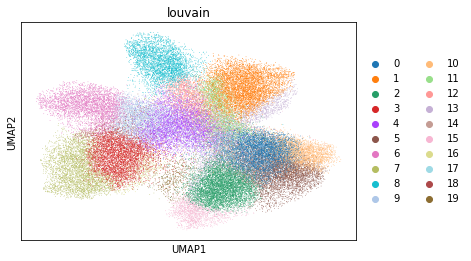

In [162]:
plt.rcParams["figure.figsize"] = (6,4)
sc.pl.umap(qr, color='louvain')

In [165]:
rna_gra = qr[qr.obs['modality'] == 'query-RNA-Granja']
cite_gra = qr[qr.obs['modality'] == 'query-CITE-Granja']
rna_10x = qr[qr.obs['modality'] == 'RNA-10x']
atac_10x = qr[qr.obs['modality'] == 'ATAC-10x']
rna_kot = qr[qr.obs['modality'] == 'RNA-Kotliarov']
cite_kot = qr[qr.obs['modality'] == 'CITE-kotliarov']

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [166]:
rna_gra.obs['condition'] = rna_gra.obs['cell_type'].map(lambda a: 'stimulated' if a.endswith('Like') else 'control')
cite_gra.obs['condition'] = cite_gra.obs['cell_type'].map(lambda a: 'stimulated' if a.endswith('Like') else 'control')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [167]:
new_cell_types_granja = {'01_HSC': 'HSC', 
                         '02_Early.Eryth':'Erythrocytes', 
                         '03_Late.Eryth': 'Erythrocytes', 
                         '04_Early.Baso': 'Basophils',
                         '05_CMP.LMPP' : 'CMP', 
                         '06_CLP.1': 'CLP', 
                         '07_GMP' : 'GMP', 
                         '08_GMP.Neut' : 'Neutrophils', 
                         '09_pDC': 'pDC', 
                         '10_cDC': 'Classical monocytes and mDC',
                         '11_CD14.Mono.1': 'Classical monocytes and mDC', 
                         '12_CD14.Mono.2': 'Classical monocytes and mDC', 
                         '13_CD16.Mono': 'Non-classical monocytes', 
                         '14_Unk': 'Unknown',
                         '15_CLP.2' : 'CLP', 
                         '16_Pre.B' : 'B', 
                         '17_B': 'B', 
                         '18_Plasma': 'Plasma', 
                         '19_CD8.N': 'CD8 naive', 
                         '20_CD4.N1': 'CD4 naive',
                         '21_CD4.N2': 'CD4 naive', 
                         '22_CD4.M': 'CD4 memory T', 
                         '23_CD8.EM': 'CD8 memory T', 
                         '24_CD8.CM': 'CD8 memory T', 
                         '25_NK': 'NK', 
                         '26_Unk': 'Unknown',
                         'Erythroid_Like': 'Erythroid_Like', 
                         'Healthy_Like': 'Healthy_Like', 
                         'Lymphoid_Like': 'Lymphoid_Like', 
                         'Myeloid_Like': 'Myeloid_Like',
                         'Progenitor_Like': 'Progenitor_Like', 
                         'TNK_Like': 'TNK_Like',
                         'Reference': 'Reference'
    
}

In [168]:
rna_kot.obs.cell_type.cat.categories

Index(['B', 'CD4 memory T', 'CD4 naive', 'CD8 memory T', 'CD8 naive',
       'Classical monocytes and mDC', 'NK', 'Non-classical monocytes',
       'Unconventional T cells', 'pDC'],
      dtype='object')

In [169]:
new_cell_types_10x = {'CD56 (bright) NK cells': 'NK', 'CD56 (dim) NK cells': 'NK', 'MAIT T cells': 'Unconventional T cells',
                  'classical monocytes': 'Classical monocytes and mDC', 'effector CD8 T cells': 'CD8 effector', 'intermediate monocytes': 'Intermediate monocytes',
                  'memory B cells': 'B', 'memory CD4 T cells': 'CD4 memory T', 'myeloid DC': 'Classical monocytes and mDC', 'naive B cells':'B',
                  'naive CD4 T cells': 'CD4 naive', 'naive CD8 T cells': 'CD8 naive', 'non-classical monocytes': 'Non-classical monocytes',
                   'plasmacytoid DC': 'pDC'
                 }

In [170]:
new_10x_cell_types_rna = [new_cell_types_10x[name] for name in rna_10x.obs.cell_type]
new_granja_cell_types_rna = [new_cell_types_granja[name] for name in rna_gra.obs.cell_type]

In [171]:
new_10x_cell_types_atac = [new_cell_types_10x[name] for name in atac_10x.obs.cell_type]
new_granja_cell_types_cite = [new_cell_types_granja[name] for name in cite_gra.obs.cell_type]

In [172]:
# 10x
rna_10x.obs['new_cell_type'] = new_10x_cell_types_rna
atac_10x.obs['new_cell_type'] = new_10x_cell_types_atac
# granja
rna_gra.obs['new_cell_type'] = new_granja_cell_types_rna
cite_gra.obs['new_cell_type'] = new_granja_cell_types_cite

rna_kot.obs['new_cell_type'] = rna_kot.obs['cell_type']
cite_kot.obs['new_cell_type'] = cite_kot.obs['cell_type']

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [173]:
rna_10x.obs['new_batch'] = 'RNA-10x'
atac_10x.obs['new_batch'] = 'ATAC-10x'
rna_kot.obs['new_batch'] = 'RNA-Kotliarov'
cite_kot.obs['new_batch'] = 'CITE-Kotliarov'

In [174]:
rna_gra_ctrl = rna_gra[rna_gra.obs['condition'] == 'control']
cite_gra_ctrl = cite_gra[cite_gra.obs['condition'] == 'control']

rna_gra_stim = rna_gra[rna_gra.obs['condition'] == 'stimulated']
cite_gra_stim = cite_gra[cite_gra.obs['condition'] == 'stimulated']

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [175]:
rna_gra_ctrl.obs['new_batch'] = 'Query-RNA-Granja-control'
cite_gra_ctrl.obs['new_batch'] = 'Query-CITE-Granja-control'

rna_gra_stim.obs['new_batch'] = 'Query-RNA-Granja-stimulated'
cite_gra_stim.obs['new_batch'] = 'Query-CITE-Granja-stimulated'

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [176]:
rna_10x.obs['condition'] = 'control'
atac_10x.obs['condition'] = 'control'
rna_kot.obs['condition'] = 'control'
cite_kot.obs['condition'] = 'control'

In [177]:
healthy = rna_10x.concatenate(atac_10x, rna_kot, cite_kot, rna_gra_ctrl, cite_gra_ctrl)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical
... storing 'new_cell_type' as categorical
... storing 'new_batch' as categorical
... storing 'condition' as categorical


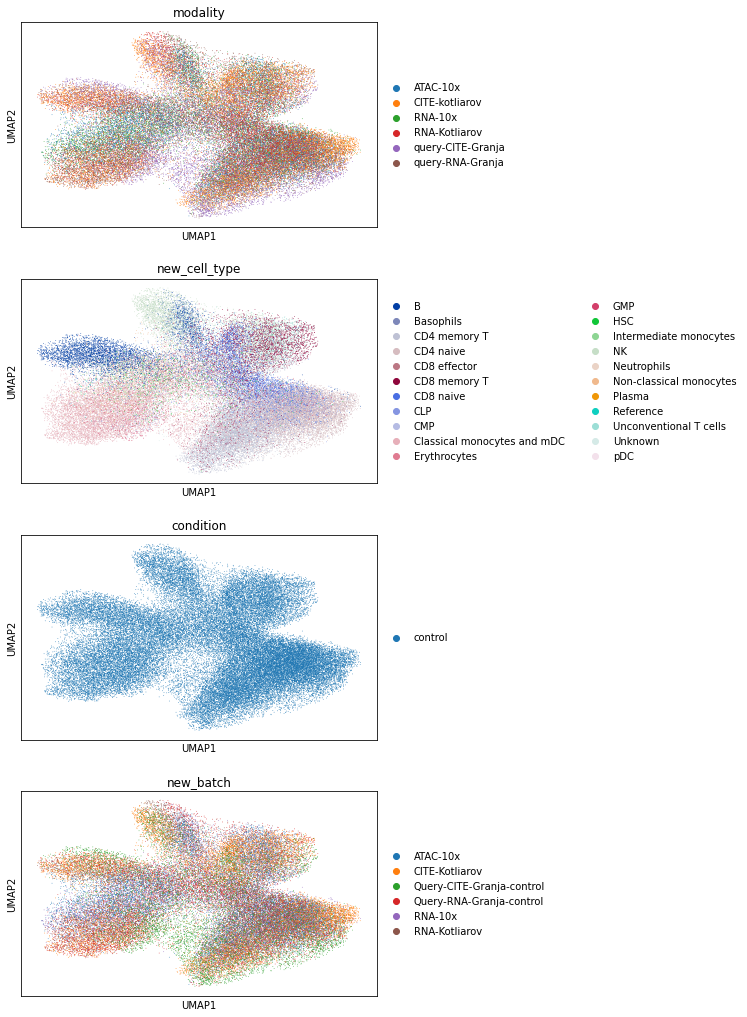

In [178]:
sc.pl.umap(healthy, color = ['modality', 'new_cell_type', 'condition', 'new_batch'], ncols = 1)

In [179]:
query = rna_gra_stim.concatenate(rna_gra_ctrl, cite_gra_ctrl, cite_gra_stim)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical
... storing 'louvain' as categorical
... storing 'condition' as categorical
... storing 'new_cell_type' as categorical
... storing 'new_batch' as categorical


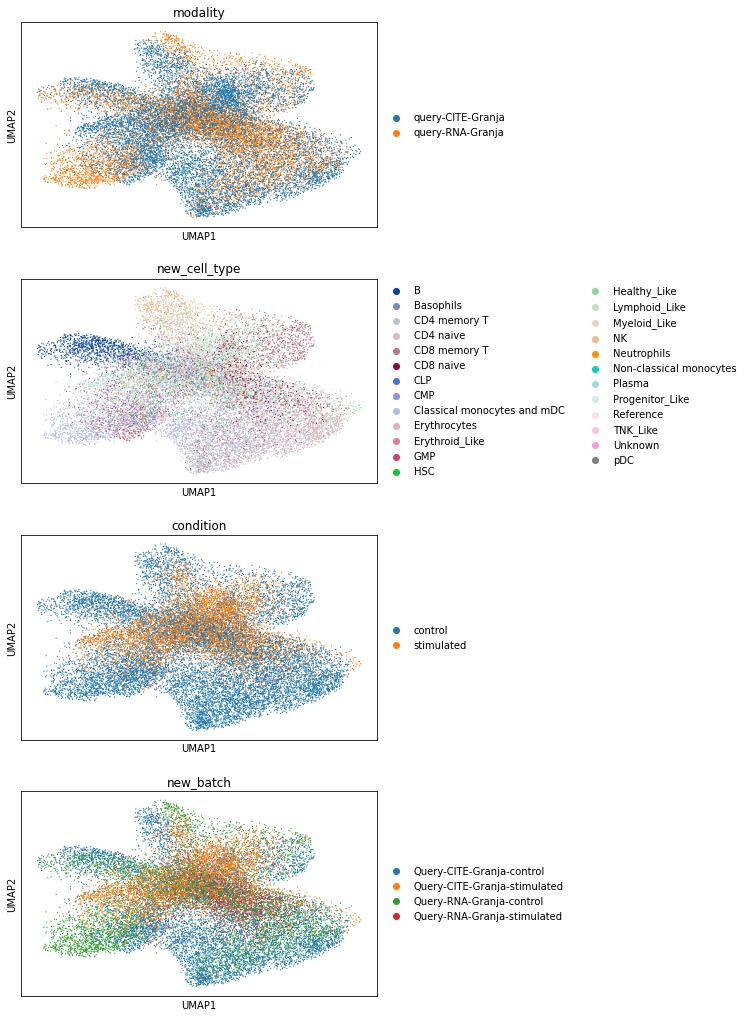

In [180]:
sc.pl.umap(query, color = ['modality', 'new_cell_type', 'condition', 'new_batch'], ncols = 1)

In [181]:
stim = rna_gra_stim.concatenate(cite_gra_stim)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'louvain' as categorical
... storing 'condition' as categorical
... storing 'new_cell_type' as categorical
... storing 'new_batch' as categorical


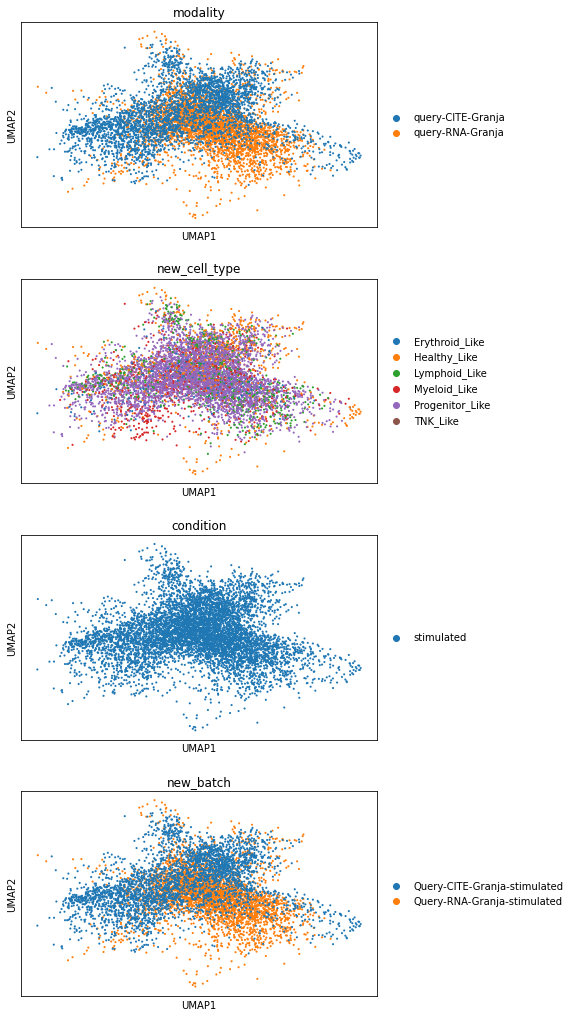

In [182]:
sc.pl.umap(stim, color = ['modality', 'new_cell_type', 'condition', 'new_batch'], ncols = 1)

In [183]:
all_cells = rna_10x.concatenate(atac_10x, rna_kot, cite_kot, rna_gra_ctrl, cite_gra_ctrl, rna_gra_stim, cite_gra_stim)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical
... storing 'louvain' as categorical
... storing 'new_cell_type' as categorical
... storing 'new_batch' as categorical
... storing 'condition' as categorical


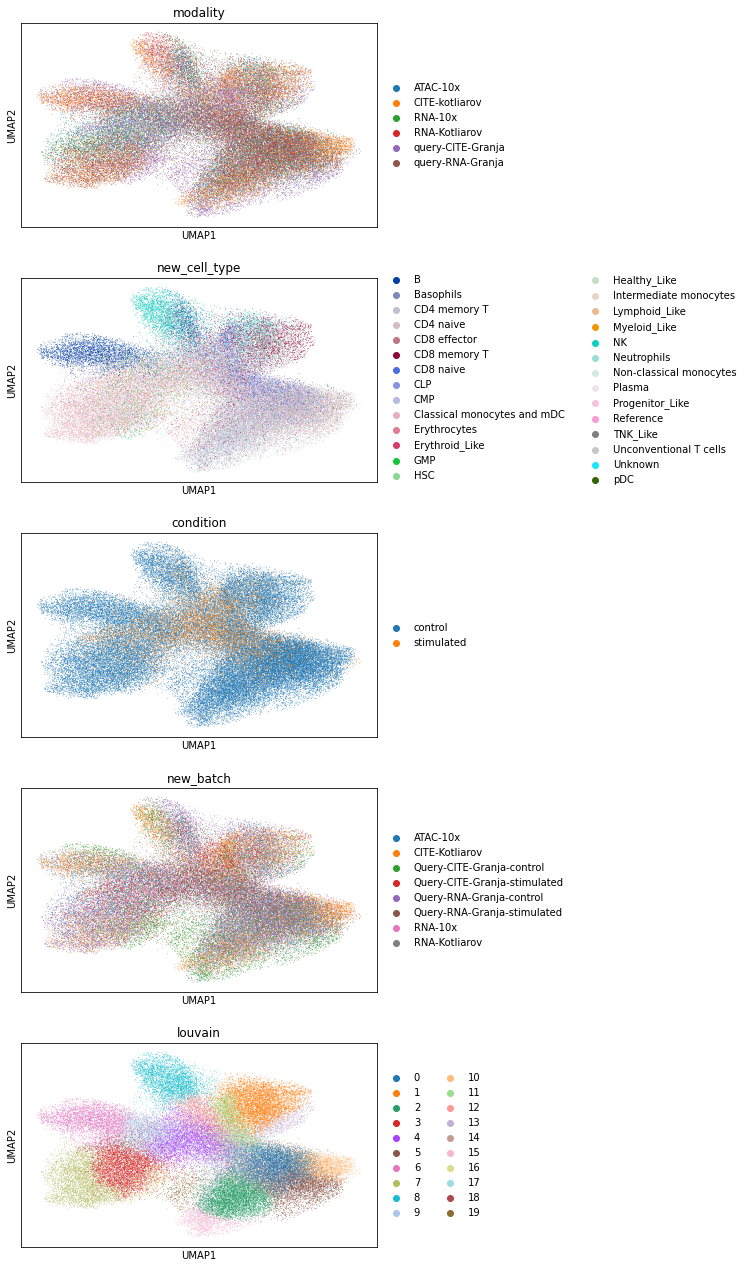

In [184]:
sc.pl.umap(all_cells, color = ['modality', 'new_cell_type', 'condition', 'new_batch', 'louvain'], ncols = 1)

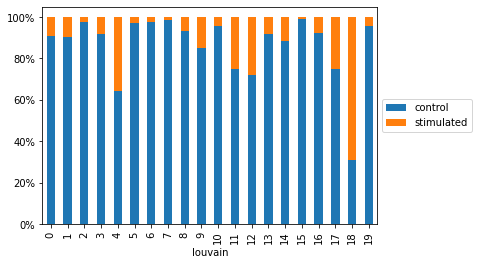

In [186]:
import matplotlib.ticker as mtick

plt.rcParams["figure.figsize"] = 6, 4

#severe = adata[(adata.obs['Symptoms'] == 'severe_week0') | (adata.obs['Symptoms'] == 'severe_week2') | (adata.obs['Symptoms'] == 'severe_week4')]

fig = all_cells.obs.groupby(['louvain', 'condition']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()
#plt.title('Composition of the sample over time (severe patient)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#fig.savefig('figures/pdf/stacked_bars_severe.pdf', bbox_inches='tight')


In [189]:
all_cells.obs['cluster18'] = all_cells.obs['louvain'].map(lambda a: 'yes' if a == '18' else 'no')
all_cells.obs


,modality,cell_type,batch,louvain,new_cell_type,new_batch,condition,cluster18
0-5-0,RNA-10x,effector CD8 T cells,0,1,CD8 effector,RNA-10x,control,no
1-5-0,RNA-10x,classical monocytes,0,3,Classical monocytes and mDC,RNA-10x,control,no
2-5-0,RNA-10x,memory CD4 T cells,0,2,CD4 memory T,RNA-10x,control,no
3-5-0,RNA-10x,memory CD4 T cells,0,13,CD4 memory T,RNA-10x,control,no
4-5-0,RNA-10x,naive CD4 T cells,0,0,CD4 naive,RNA-10x,control,no
...,...,...,...,...,...,...,...,...
9985-2-7,query-CITE-Granja,Progenitor_Like,7,11,Progenitor_Like,Query-CITE-Granja-stimulated,stimulated,no
9986-2-7,query-CITE-Granja,Progenitor_Like,7,9,Progenitor_Like,Query-CITE-Granja-stimulated,stimulated,no
9987-2-7,query-CITE-Granja,Progenitor_Like,7,12,Progenitor_Like,Query-CITE-Granja-stimulated,stimulated,no
9993-2-7,query-CITE-Granja,Healthy_Like,7,13,Healthy_Like,Query-CITE-Granja-stimulated,stimulated,no


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'cluster18' as categorical


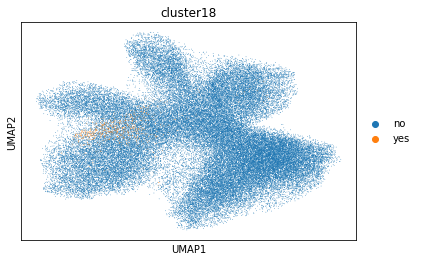

In [190]:
sc.pl.umap(all_cells, color=['cluster18'])

In [194]:
cite_kot_ = sc.read('data/kotliarov-2020/cite/protein.h5ad')
cite_kot_ 

AnnData object with n_obs × n_vars = 52117 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [196]:
n_samples = 10000
np.random.seed(42)

#query_sample_indices = np.random.choice(rna_gra_.shape[0], size=q_n_samples, replace=False)
sample_indices = np.random.choice(cite_kot_.shape[0], size=n_samples, replace=False)

#rna_gra_ = rna_gra_[query_sample_indices]
#cite_gra_ = cite_gra_[query_sample_indices]

#rna_kot_ = rna_kot_[sample_indices]
cite_kot_ = cite_kot_[sample_indices]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [197]:
cite_kot_.obs

,batch,cluster_level2,cluster_level3,sample,cell_type,n_genes
CACAGGCAGTGTGAAT_H1B1ln3,1,CD4 naive,CD4 naive,209_d0,CD4 naive,69
GTAACTGTCTTAACCT_H1B2ln6,2,CD4 naive,CD4 naive,229_d0,CD4 naive,81
CGTTCTGAGACCCACC_H1B1ln4,1,CD4 naive,CD4 naive,256_d0,CD4 naive,78
TACGGATTCATTTGGG_H1B2ln5,2,CD8 naive,CD8 naive,205_d0,CD8 naive,67
GATCGCGCAACGATGG_H1B1ln4,1,Non-classical monocytes,Non-classical monocytes,212_d0,Non-classical monocytes,81
...,...,...,...,...,...,...
ATAACGCAGAAGATTC_H1B1ln6,1,Classical monocytes,Classical monocytes,256_d0,Classical monocytes and mDC,77
GGCCGATCAGGTCTCG_H1B1ln3,1,CD8 memory T,NKT-like (CD56+/CD3+),200_d0,CD8 memory T,78
GAGCAGAGTCAGTGGA_H1B2ln5,2,CD4 central and transitional memory T,CD4 central and transitional memory T,205_d0,CD4 memory T,74
TCGGTAATCTCGCTTG_H1B1ln3,1,NK,CD16++ NK,207_d0,NK,72


In [198]:
cite_kot.obs

,modality,cell_type,batch,louvain,new_cell_type,new_batch,condition
0-3,CITE-kotliarov,CD8 naive,3,11,CD8 naive,CITE-Kotliarov,control
1-3,CITE-kotliarov,B,3,6,B,CITE-Kotliarov,control
2-3,CITE-kotliarov,NK,3,8,NK,CITE-Kotliarov,control
3-3,CITE-kotliarov,B,3,9,B,CITE-Kotliarov,control
4-3,CITE-kotliarov,CD4 memory T,3,2,CD4 memory T,CITE-Kotliarov,control
...,...,...,...,...,...,...,...
9995-3,CITE-kotliarov,CD4 memory T,3,2,CD4 memory T,CITE-Kotliarov,control
9996-3,CITE-kotliarov,CD4 memory T,3,2,CD4 memory T,CITE-Kotliarov,control
9997-3,CITE-kotliarov,CD8 naive,3,1,CD8 naive,CITE-Kotliarov,control
9998-3,CITE-kotliarov,CD4 naive,3,0,CD4 naive,CITE-Kotliarov,control


In [200]:
rna_10x_ = sc.read('data/10xpbmc10k-2020/expressions.h5ad')
rna_10x_

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [203]:
rna_10x_.obs

,cell_type,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAGCCAAGGAATC-1,naive CD4 T cells,3308,3307,8.104099,8379.0,9.033604,626.0,6.440947,7.471058
AAACAGCCAATCCCTT-1,memory CD4 T cells,1896,1895,7.547502,3770.0,8.235096,397.0,5.986452,10.530504
AAACAGCCAATGCGCT-1,naive CD4 T cells,2904,2903,7.973844,6875.0,8.835793,444.0,6.098074,6.458182
AAACAGCCAGTAGGTG-1,naive CD4 T cells,3061,3061,8.026824,7614.0,8.937875,525.0,6.265301,6.895193
AAACAGCCAGTTTACG-1,memory CD4 T cells,1691,1691,7.433667,3633.0,8.198090,152.0,5.030438,4.183870
...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1,naive CD8 T cells,1586,1585,7.368970,3284.0,8.097122,358.0,5.883322,10.901340
TTTGTTGGTGTTAAAC-1,naive CD8 T cells,1525,1524,7.329750,2865.0,7.960672,317.0,5.762052,11.064572
TTTGTTGGTTAGGATT-1,CD56 (bright) NK cells,2024,2023,7.612831,4147.0,8.330381,412.0,6.023448,9.934893
TTTGTTGGTTGGTTAG-1,memory CD4 T cells,1620,1618,7.389564,2974.0,7.997999,159.0,5.075174,5.346335


In [202]:
rna_10x.obs

,modality,cell_type,batch,louvain,new_cell_type,new_batch,condition
0-5,RNA-10x,effector CD8 T cells,5,1,CD8 effector,RNA-10x,control
1-5,RNA-10x,classical monocytes,5,3,Classical monocytes and mDC,RNA-10x,control
2-5,RNA-10x,memory CD4 T cells,5,2,CD4 memory T,RNA-10x,control
3-5,RNA-10x,memory CD4 T cells,5,13,CD4 memory T,RNA-10x,control
4-5,RNA-10x,naive CD4 T cells,5,0,CD4 naive,RNA-10x,control
...,...,...,...,...,...,...,...
9995-5,RNA-10x,memory CD4 T cells,5,2,CD4 memory T,RNA-10x,control
9996-5,RNA-10x,effector CD8 T cells,5,1,CD8 effector,RNA-10x,control
9997-5,RNA-10x,naive CD8 T cells,5,0,CD8 naive,RNA-10x,control
9998-5,RNA-10x,naive CD4 T cells,5,0,CD4 naive,RNA-10x,control
